In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load combined train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed.npz") as npz_file:
    X_tr_np = npz_file["features"]
    y_tr = npz_file["labels"]
    print("X_tr shape:", X_tr_np.shape)
    print("y_tr shape:", y_tr.shape)
    
# load combined val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed.npz") as npz_file:
    X_val_np = npz_file["features"]
    y_val = npz_file["labels"]
    print("X_val shape:", X_val_np.shape)
    print("y_val shape:", y_val.shape)
    
# load combined test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed.npz") as npz_file:
    X_te_np = npz_file["features"]
    y_te = npz_file["labels"]
    print("X_te shape:", X_te_np.shape)
    print("y_te shape:", y_te.shape)

X_tr shape: (115027, 223)
y_tr shape: (115027,)
X_val shape: (41424, 223)
y_val shape: (41424,)
X_te shape: (41378, 223)
y_te shape: (41378,)


In [3]:
# load B term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_b.npz") as npz_file:
    X_tr_b_np = npz_file["features"]
    y_tr_b = npz_file["labels"]
    print("X_tr_b shape:", X_tr_b_np.shape)
    print("y_tr_b shape:", y_tr_b.shape)
    
# load B term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_b.npz") as npz_file:
    X_val_b_np = npz_file["features"]
    y_val_b = npz_file["labels"]
    print("X_val_b shape:", X_val_b_np.shape)
    print("y_val_b shape:", y_val_b.shape)
    
# load B term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_b.npz") as npz_file:
    X_te_b_np = npz_file["features"]
    y_te_b = npz_file["labels"]
    print("X_te_b shape:", X_te_b_np.shape)
    print("y_te_b shape:", y_te_b.shape)

X_tr_b shape: (44295, 125)
y_tr_b shape: (44295,)
X_val_b shape: (15387, 125)
y_val_b shape: (15387,)
X_te_b shape: (15871, 125)
y_te_b shape: (15871,)


In [4]:
# load J term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_j.npz") as npz_file:
    X_tr_j_np = npz_file["features"]
    y_tr_j = npz_file["labels"]
    print("X_tr_j shape:", X_tr_j_np.shape)
    print("y_tr_j shape:", y_tr_j.shape)
    
# load J term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_j.npz") as npz_file:
    X_val_j_np = npz_file["features"]
    y_val_j = npz_file["labels"]
    print("X_val_j shape:", X_val_j_np.shape)
    print("y_val_j shape:", y_val_j.shape)
    
# load J term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_j.npz") as npz_file:
    X_te_j_np = npz_file["features"]
    y_te_j = npz_file["labels"]
    print("X_te_j shape:", X_te_j_np.shape)
    print("y_te_j shape:", y_te_j.shape)

X_tr_j shape: (62447, 137)
y_tr_j shape: (62447,)
X_val_j shape: (22864, 137)
y_val_j shape: (22864,)
X_te_j shape: (22738, 137)
y_te_j shape: (22738,)


As all the files are very large, the computation time required for e.g. grid search gets extremely long. Therefore, I will use sparse matrices, which significantly speed up the compute time of every model and tuning operation.

Scipy advises that it is better to construct matrices from numpy arrays using `lil_matrix` first, which is a linked-list matrix. Only after that it is advised to convert the matrix to sklearn's required `csr` format.

In [5]:
# convert all matrices to sparse format to use in models
from scipy.sparse import lil_matrix

X_tr = lil_matrix(X_tr_np, dtype = np.float32).tocsr()
X_val = lil_matrix(X_val_np, dtype = np.float32).tocsr()
X_te = lil_matrix(X_te_np, dtype = np.float32).tocsr()

X_tr_b = lil_matrix(X_tr_b_np, dtype = np.float32).tocsr()
X_val_b = lil_matrix(X_val_b_np, dtype = np.float32).tocsr()
X_te_b = lil_matrix(X_te_b_np, dtype = np.float32).tocsr()

X_tr_j = lil_matrix(X_tr_j_np, dtype = np.float32).tocsr()
X_val_j = lil_matrix(X_val_j_np, dtype = np.float32).tocsr()
X_te_j = lil_matrix(X_te_j_np, dtype = np.float32).tocsr()

### Most-Frequent Baseline
We will now get the most-frequent baseline of all of our sets. The theory is to create a naïve model that always predicts the most frequent value of the train set and always predicts that value in the test set.

In [6]:
from sklearn.dummy import DummyClassifier

# create object
dummy = DummyClassifier(strategy = "most_frequent")

# fit object, combined set
dummy.fit(None, y_tr)
# get accuracy of combined test set
logreg_baseline = dummy.score(None, y_te)
print("combined test set accuracy: {:.2f}".format(logreg_baseline))

# fit objet, B term
dummy.fit(None, y_tr_b)
# get accuracy of B term test set
logreg_baseline_b = dummy.score(None, y_te_b)
print("B term test set accuracy: {:.2f}".format(logreg_baseline_b))

# fit object, J term
dummy.fit(None, y_tr_j)
# get accuracy of J term test set
logreg_baseline_j = dummy.score(None, y_te_j)
print("J term test set accuracy: {:.2f}".format(logreg_baseline_j))

combined test set accuracy: 0.58
B term test set accuracy: 0.59
J term test set accuracy: 0.58


Our unique student data got partially multiplied in the merging process, hence our final results also got multiplied. As a consequence, the most common label `Pass` got multiplied, too, because all students who passed wrote multiple assessments which all have the final result `Pass`.

A baseline accuracy of 58% or 59% is rather high, however, it is plausible as the label `Pass` got multiplied and now apparently accounts for around 60% of all labels.

### Logistic Regression
We will now build a logistic regression classifier. At first, we will check whether One-vs-Rest multi-class or softmax produces better results.

#### Regarding scaling:
One one hand, we need a sparse matrix because otherwise computation time is extremely high for the following estimators. On the other hand, `StandardScaler` doesn't accept a sparse matrix as input because [centering a sparse matrix would destroy the sparse structure](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-sparse-data). Sklearn mentions that one way to fight this problem is to use `StandardScaler` and use `with_mean = False`. However, the suggested and preferred (by sklearn) way is to use [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler), which doesn't center the data around 0 but scales it in a `[-1, 1]` range.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

# OvR, saga for large data sets
logreg_ovr = LogisticRegression(multi_class = "ovr", solver = "liblinear")

# create pipelines to apply MaxAbsScaler
pipe_ovr = Pipeline([
    ("scaler", MaxAbsScaler()), # scale numerical features but don't center them to keep sparse matrix
    ("logreg_ovr", logreg_ovr)]) # logistic regression object

# fit with training data
pipe_ovr.fit(X_tr, y_tr)

# get accuracy on test data
pipe_ovr_acc = pipe_ovr.score(X_te, y_te)

print("OvR/liblinear logistic regression accuracy, combined model: {:.2f}".format(pipe_ovr_acc))

OvR/liblinear logistic regression accuracy, combined model: 0.66


In [8]:
# liblinear isn't compatible with multinomial 
np.random.seed(0)

# create object
logreg_sm = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", n_jobs = -1)

# create pipeline
pipe_sm = Pipeline([("scaler", MaxAbsScaler()), ("logreg_sm", logreg_sm)])

# fit with training data
pipe_sm.fit(X_tr, y_tr)

# get accuracy
pipe_sm_acc = pipe_sm.score(X_te, y_te)
print("Softmax/lbfgs logistic regression accuracy, combined model: {:.2f}".format(pipe_sm_acc))

Softmax/lbfgs logistic regression accuracy, combined model: 0.65


In [9]:
np.random.seed(0)

# create object
logreg_sm2 = LogisticRegression(multi_class = "multinomial", solver = "sag", n_jobs = -1, max_iter = 200)

# create pipeline
pipe_sm2 = Pipeline([("scaler", MaxAbsScaler()), ("logreg_sm2", logreg_sm2)])

# fit with training data
pipe_sm2.fit(X_tr, y_tr)

# get accuracy
pipe_sm2_acc = pipe_sm2.score(X_te, y_te)
print("Softmax/sag logistic regression accuracy, combined model: {:.2f}".format(pipe_sm2_acc))

Softmax/sag logistic regression accuracy, combined model: 0.66


/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [10]:
np.random.seed(0)

# create object
logreg_sm3 = LogisticRegression(multi_class = "multinomial", solver = "saga", n_jobs = -1)

# create pipeline
pipe_sm3 = Pipeline([("scaler", MaxAbsScaler()), ("logreg_sm3", logreg_sm3)])

# fit with training data
pipe_sm3.fit(X_tr, y_tr)

# get accuracy
pipe_sm3_acc = pipe_sm3.score(X_te, y_te)
print("Softmax/saga logistic regression accuracy, combined model: {:.2f}".format(pipe_sm3_acc))

Softmax/saga logistic regression accuracy, combined model: 0.66


We get marginally better results with `multi_class = "multinomial"` in combination with `solver = "sag"` or `solver = "saga"` than with `scaler = "lbfgs"` or `scaler = "liblinear"`. For `solver = "sag"`, we need 200 maximum iterations whereas `solver = "saga"` works with the default 100.
For this reason, going forward, I will use `multi_class = "multinomial", solver = "saga"`.

We will now start the process of finding the best regularization strength `C` for each of the combined/B/J sets.

In [11]:
from sklearn.model_selection import ParameterGrid

# create 3 pipelines for our models
pipe_lr = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("logreg", LogisticRegression(multi_class = "multinomial", solver = "saga", n_jobs = -1, tol = 0.001,
                                  max_iter = 300))]) # we still need more iterations for grid search


# create grid, here, we only have one parameter: C
grid_lr = ParameterGrid({
    "logreg__C": np.logspace(-4, 1, 20) # hyperparameter affect model on logarithmic scale
})

# length of grid: 20 values
print("length of logistic regression grid:", len(grid_lr))

length of logistic regression grid: 20


In [12]:
# combined model
# loop through all combinations
np.random.seed(0)

# save results
logreg_results = []

for param_C in grid_lr:
    pipe_lr.set_params(**param_C)
    
    # fit pipe
    pipe_lr.fit(X_tr, y_tr)
    
    # calculate accuracy
    test_acc = pipe_lr.score(X_val, y_val)
    train_acc = pipe_lr.score(X_tr, y_tr)
    
    # append accuracy to param_C
    param_C["val_acc"] = test_acc
    param_C["train_acc"] = train_acc
    
    # append param_C to logreg_results
    logreg_results.append(param_C)
    
# transform list to DataFrame
logreg_results = pd.DataFrame(logreg_results)
logreg_results.sort_values(by = "val_acc", ascending = False)[:5]

,logreg__C,train_acc,val_acc
17,2.976351,0.667895,0.648127
19,10.000000,0.668817,0.647934
18,5.455595,0.668374,0.647789
16,1.623777,0.666791,0.647378
14,0.483293,0.662810,0.646606


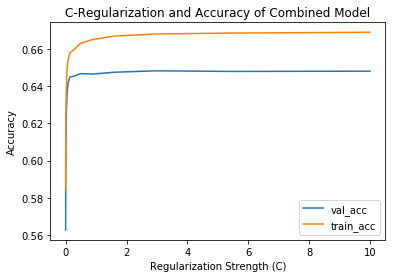

In [13]:
# visualize results
plt.plot(logreg_results["logreg__C"], logreg_results["val_acc"], label = "val_acc")
plt.plot(logreg_results["logreg__C"], logreg_results["train_acc"], label = "train_acc")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("C-Regularization and Accuracy of Combined Model")
plt.legend()
plt.show()

`C` works inversely, meaning that smaller values indicate stronger regularization. In our case, values close to zero, produce the best results with very little overfitting. Let's get a closer look at which `C` the difference between train and validation set is smallest.

In [14]:
logreg_results["diff"] = logreg_results["train_acc"] - logreg_results["val_acc"]
logreg_results.sort_values(by = "diff", ascending = True)[:5]

,logreg__C,train_acc,val_acc,diff
11,0.078476,0.654073,0.641705,0.012367
10,0.042813,0.648283,0.635670,0.012612
12,0.143845,0.657932,0.644868,0.013065
9,0.023357,0.639919,0.625966,0.013954
13,0.263665,0.659306,0.645182,0.014125


We can see that the least overfitting takes place at `C = 0.078476`. As we can see in the graph, from there onwards train accuracy gets only slightly better while overfitting grows.

Our model thus far has a validation accuracy of 64.24%.

In [15]:
# B term
# loop through all combinations
np.random.seed(0)

# save results
logreg_results_b = []

for param_C in grid_lr:
    pipe_lr.set_params(**param_C)
    
    # fit pipe
    pipe_lr.fit(X_tr_b, y_tr_b)
    
    # calculate accuracy
    val_acc = pipe_lr.score(X_val_b, y_val_b)
    train_acc = pipe_lr.score(X_tr_b, y_tr_b)
    
    # append accuracy to param_C
    param_C["val_acc"] = val_acc
    param_C["train_acc"] = train_acc
    
    # append param_C to logreg_results
    logreg_results_b.append(param_C)
    
# transform list to DataFrame
logreg_results_b = pd.DataFrame(logreg_results_b)
logreg_results_b.sort_values(by = "val_acc", ascending = False)[:5]

,logreg__C,train_acc,val_acc
19,10.000000,0.670459,0.658803
18,5.455595,0.669534,0.657763
17,2.976351,0.667841,0.656983
16,1.623777,0.664815,0.656853
15,0.885867,0.661474,0.655423


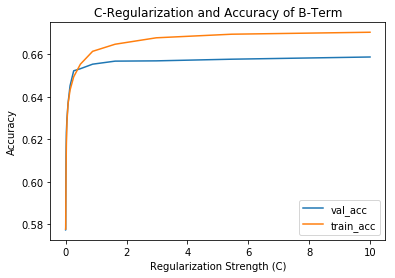

In [16]:
# visualize results
plt.plot(logreg_results_b["logreg__C"], logreg_results_b["val_acc"], label = "val_acc")
plt.plot(logreg_results_b["logreg__C"], logreg_results_b["train_acc"], label = "train_acc")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("C-Regularization and Accuracy of B-Term")
plt.legend()
plt.show()

In [17]:
logreg_results_b["diff"] = logreg_results_b["train_acc"] - logreg_results_b["val_acc"]
logreg_results_b.sort_values(by = "diff", ascending = True)[14:]

,logreg__C,train_acc,val_acc,diff
14,0.483293,0.655401,0.653279,0.002123
15,0.885867,0.661474,0.655423,0.006051
16,1.623777,0.664815,0.656853,0.007962
17,2.976351,0.667841,0.656983,0.010857
19,10.000000,0.670459,0.658803,0.011657
18,5.455595,0.669534,0.657763,0.011771


Although there are some values for `C` where the validation accuracy is higher than train accuracy, I prefer to use `C = 0.483293` as it has a higher overall accuracy with 0.2% overfitting. Decreasing `C` more, i.e. larger `C` values, only further increase the spread between train and validation accuracy.

The resulting validation accuracy for the B-term is: 65.32%

In [18]:
# J term
# loop through all combinations
np.random.seed(0)

# save results
logreg_results_j = []

for param_C in grid_lr:
    pipe_lr.set_params(**param_C)
    
    # fit pipe
    pipe_lr.fit(X_tr_j, y_tr_j)
    
    # calculate accuracy
    val_acc = pipe_lr.score(X_val_j, y_val_j)
    train_acc = pipe_lr.score(X_tr_j, y_tr_j)
    
    # append accuracy to param_C
    param_C["val_acc"] = val_acc
    param_C["train_acc"] = train_acc
    
    # append param_C to logreg_results
    logreg_results_j.append(param_C)
    
# transform list to DataFrame
logreg_results_j = pd.DataFrame(logreg_results_j)
logreg_results_j.sort_values(by = "val_acc", ascending = False)[:5]

,logreg__C,train_acc,val_acc
17,2.976351,0.693388,0.676697
19,10.000000,0.693804,0.676435
18,5.455595,0.693836,0.676085
16,1.623777,0.691594,0.676041
15,0.885867,0.688952,0.673111


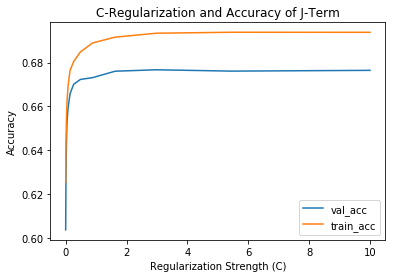

In [19]:
# visualize results
plt.plot(logreg_results_j["logreg__C"], logreg_results_j["val_acc"], label = "val_acc")
plt.plot(logreg_results_j["logreg__C"], logreg_results_j["train_acc"], label = "train_acc")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("C-Regularization and Accuracy of J-Term")
plt.legend()
plt.show()

In [20]:
logreg_results_j["diff"] = logreg_results_j["train_acc"] - logreg_results_j["val_acc"]
logreg_results_j.sort_values(by = "diff", ascending = True)[:5]

,logreg__C,train_acc,val_acc,diff
10,0.042813,0.662049,0.652685,0.009364
11,0.078476,0.669288,0.659202,0.010085
13,0.263665,0.680465,0.670093,0.010372
12,0.143845,0.676414,0.665763,0.010651
9,0.023357,0.652954,0.642101,0.010853


With the j-term model, we can reach some higher train accuracies while also overfitting more. A `C = 0.263665` allows us to reach a validation accuracy of 67.00% with only 1% overfitting, which is the best trade-off in my opinion.

We will now evaluate our scores on the actual test sets.

In [21]:
np.random.seed(0)

# create 3 pipelines, evaluate on test data with results from grid search
logreg = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("logreg", LogisticRegression(C = 0.078476, multi_class = "multinomial", solver = "saga", tol = 0.001,
                                 max_iter = 300, n_jobs = -1))])

# combined model, fit training data
logreg.fit(X_tr, y_tr)

# get accuracy on test set
logreg_acc = logreg.score(X_te, y_te)
print("Combined logistic regression accuracy: {:.4f}".format(logreg_acc))


# B term
logreg_b = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("logreg", LogisticRegression(C = 0.483293, multi_class = "multinomial", solver = "saga", tol = 0.001,
                                 max_iter = 300, n_jobs = -1))])

# fit on training data
logreg_b.fit(X_tr_b, y_tr_b)

# get accuracy on test set
logreg_acc_b = logreg_b.score(X_te_b, y_te_b)
print("B term logistic regression accuracy: {:.4f}".format(logreg_acc_b))


# J term
logreg_j = Pipeline([
    ("scaler", MaxAbsScaler()),
    ("logreg", LogisticRegression(C = 0.263665, multi_class = "multinomial", solver = "saga", tol = 0.001,
                                 max_iter = 300, n_jobs = -1))])

# fit on training data
logreg_j.fit(X_tr_j, y_tr_j)

# get accuracy on test set
logreg_acc_j = logreg_j.score(X_te_j, y_te_j)
print("J term logistic regression accuracy: {:.4f}".format(logreg_acc_j))

Combined logistic regression accuracy: 0.6533
B term logistic regression accuracy: 0.6655
J term logistic regression accuracy: 0.6527


Our final logistic regression results are:
* Combined set:
    * train: 65.44%, val: 64.24%, test: 65.33%
* B term:
    * train: 65.54%, val: 65.32%, test: 66.55%
* J term:
    * train: 68.05%, val: 67.01%, test: 65.27%

In comparison to our grid search validation scores, both the combined and B-term test scores have improved, but still only marginally: The combined model as well as B-term accuracy increased roughly ~1 percentage point. Nevertheless, our until now best performing validation model, the J-term set, decreased almost 2 percentage point in the test set. This means that the generalization of the separate J-term model isn't as good as e.g. the combined set. Both models had an overfitting of around 1 percentage point, but the combined set, unlike the J-term set, still managed to generalize better on the test set.

In general, we were able to beat all baselines consistently by around 6-7 percentage points, which is a solid increase considering that the baseline was already around 58-59% accuracy.

### Predicting final outcomes based on artificial student profiles
In the following, we will use our tuned, combined model to make predictions based on invented student profiles. I will first generate 3 profiles, show the probabilities for each class, and then change certain demographic backgrounds, scores or VLE activity to see how the probabilities for each class change.

In [22]:
# load tr_data_df to see which assessment IDs are in which course
tr_data_df = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/tr_data_df.csv")

# load column_names_cleaned
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/column_names_cleaned.npz") as npz_file:
    column_names_cleaned = list(npz_file["features"])

# show some columns which are needed to build a profile
# x7 is not displayed because those are just ~180 id_assessments
print(column_names_cleaned[:25], column_names_cleaned[-17:])

['x0_AAA', 'x0_BBB', 'x0_CCC', 'x0_DDD', 'x0_EEE', 'x0_FFF', 'x1_B', 'x2_F', 'x3_East Anglian Region', 'x3_East Midlands Region', 'x3_Ireland', 'x3_London Region', 'x3_North Region', 'x3_North Western Region', 'x3_Scotland', 'x3_South East Region', 'x3_South Region', 'x3_South West Region', 'x3_Wales', 'x3_West Midlands Region', 'x4_0', 'x4_1', 'x5_N', 'x6_-150.0', 'x6_-50.0'] ['x8_0', 'x9_forumng', 'x9_homepage', 'x9_oucontent', 'x9_quiz', 'x9_resource', 'x9_subpage', 'x10_0', 'highest_education', 'age_band', 'date_submitted', 'score', 'module_presentation_length', 'total_sites_used', 'total_clicks', 'avg_working_dates', 'imd_band']


In [23]:
# get assessment of module AAA, arbitrarily chosen
tr_data_df.loc[tr_data_df["code_module"] == "AAA", "id_assessment"][21:22] # 1759

# get assessment of module BBB
tr_data_df.loc[tr_data_df["code_module"] == "BBB", "id_assessment"][160:161] # 15012

# get assessment of module EEE
tr_data_df.loc[tr_data_df["code_module"] == "CCC", "id_assessment"][1198:1199] # 25335

# get assessment of module FFF
tr_data_df.loc[tr_data_df["code_module"] == "FFF", "id_assessment"][3142:3143] # 34889

37527    34889
Name: id_assessment, dtype: int64

The first student will:
* enroll in module `EEE`
* in the `J` term
* be female
* come from London region
* studied for 60 or below credits
* no disability
* `date_registration` before 150 days in advance of presentation start
* sit `id_assessment = 25335`
* score is not banked
* will learn most often with `quiz`
* is on his second attempt
* `highest_education = 2` --> A-Level or Equivalent
* be 35 or younger
* `date_submitted = 56`
* assessment `score` of 71
* `module_presentation_length = 265`
* `total_sites_used = 145`
* `total_clicks = 402`
* `avg_working_dates = 99`
* `imd_band = 65`

I will now initialize an array with all zeros and then fill the needed columns with `1` or the respective other values.

In [24]:
student1 = np.zeros(shape = (1, len(column_names_cleaned)))

# define OHE values and all other values in above described order
characteristics1 = [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, np.log(30+56), np.log(30+71), np.log(30+265),
                   np.log(30+145), np.log(30+402), np.log(30+99), 65]

# outline the column names to change values
columns1 = ["x0_EEE", "x1_B", "x2_F", "x3_London Region", "x4_0", "x5_N", "x6_-150.0", "x7_25335", "x8_0",
           "x9_quiz", "x10_0", "highest_education", "age_band", "date_submitted", "score",
           "module_presentation_length", "total_sites_used", "total_clicks", "avg_working_dates",
            "imd_band"]

# iterate through columns1 and find indices of that column in column_names_cleaned
indices1 = [column_names_cleaned.index(col1) for col1 in columns1]

# change respective value from 0 to the one outlined in characterstics1
for idx, new_val in zip(indices1, characteristics1):
    student1[:, idx] = new_val

In [25]:
# make prediction based on student1 profile
logreg.predict_proba(student1)

array([[0.0472074 , 0.35962341, 0.55333773, 0.03983145]])

We can see here that this student will most certainly `Pass` the course with a probability of 55%. The second highest probability of 36% points towards `Withdrawn`. For this profile, I think it makes sense that the algorithm guesses that the student will pass as we have a `score` of 71 and an `avg_working_dates` of 99, which is centered. However, we saw from EDA that `total_clicks` and `total_sites_used` should be much higher for a `Pass` score as the passing median for `total_sites_used` is 452 and for `total_clicks` is 1493. Both of our these characteristics are below the median of `Fail`, so it seems that `score` and all demographics point towards `Pass` and are valed highly here.

Let's lower the `score` to 45 and `highest_education` to 0, which marks _No formal education_. 

In [26]:
student1_2 = student1.copy()
student1_2[:, indices1[14]] = np.log(30 + 45) # score change

student1_2[:, indices1[11]] = 0

# make prediction
logreg.predict_proba(student1_2)

array([[0.00792255, 0.57331258, 0.37908503, 0.03967984]])

We can see that just these two characteristics changes turned the categories completely around. We now have a 57% probability that the student withdraws, and just a 37% probability that the student passes. The `score` and `highest_education` changes were definitely impactful.

What is interesting to me is that the student before had a 4% chance of `Fail`, which has now shrunk to 0.79%. In my personal estimates, that value should also have risen as from a human perspective it is not clear whether the student might withdraw or fail with both low scores and VLE activity levels. Following the three predictions, we will evaluate with confusion matrices in what directions the predictions went wrong.

Student2 Profile: Let's simulate an overall strong activity level with a low score
* enroll in module `BBB`
* in the `B` term
* be female
* come from East Anglian Region
* studied for 60 or below credits
* no disability
* `date_registration` between 150 and 50 days in advance of presentation start
* sit `id_assessment = 15012`
* score is not banked
* will learn most often with `homepage`
* is on his first attempt
* `highest_education = 3` --> Higher Eduction Qualification
* be 35 or younger
* `date_submitted = 112`
* assessment `score` of 21
* `module_presentation_length = 241`
* `total_sites_used = 1609`
* `total_clicks = 4412`
* `avg_working_dates = 79`
* `imd_band = 75`

In [27]:
student2 = np.zeros(shape = (1, len(column_names_cleaned)))

# define OHE values and all other values in above described order
characteristics2 = [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, np.log(30+112), np.log(30+21), np.log(30+241),
                   np.log(30+1609), np.log(30+4412), np.log(30+79), 75]

# outline the column names to change values
columns2 = ["x0_BBB", "x1_B", "x2_F", "x3_East Anglian Region", "x4_0", "x5_N", "x6_-50.0", "x7_15012",
            "x8_0", "x9_homepage", "x10_0", "highest_education", "age_band", "date_submitted", "score",
           "module_presentation_length", "total_sites_used", "total_clicks", "avg_working_dates",
            "imd_band"]

# iterate through columns1 and find indices of that column in column_names_cleaned
indices2 = [column_names_cleaned.index(col2) for col2 in columns2]

# change respective value from 0 to the one outlined in characterstics1
for idx, new_val in zip(indices2, characteristics2):
    student2[:, idx] = new_val

In [28]:
# make prediction based on student1 profile
logreg.predict_proba(student2)

array([[0.28994308, 0.05383733, 0.64235039, 0.0138692 ]])

Here it becomes pretty clear that this student might indeed fail despite all the very positive activity simply because `score` is very low. Maybe the logistic regression classifier needs the very low `score` to be able to predict `Fail` at all. In this case, the student still has a 64% of `Pass` and a 29% `Fail` probability. 

Let's change the module to `FFF` together with the assessment and then re-evaluate how a module change - leaving everything else equal - affects the final result probabilities.

In [29]:
# building new student profile is easier than adjusting indices in the existing
student2_2 = np.zeros(shape = (1, len(column_names_cleaned)))

columns2_2 = ["x0_FFF", "x1_B", "x2_F", "x3_East Anglian Region", "x4_0", "x5_N", "x6_-50.0", "x7_34889",
            "x8_0", "x9_homepage", "x10_0", "highest_education", "age_band", "date_submitted", "score",
           "module_presentation_length", "total_sites_used", "total_clicks", "avg_working_dates",
            "imd_band"]

# iterate through columns1 and find indices of that column in column_names_cleaned
indices2_2 = [column_names_cleaned.index(col2_2) for col2_2 in columns2_2]

# change respective value from 0 to the one outlined in characterstics1
for idx, new_val in zip(indices2_2, characteristics2): # characteristics2 stays the same
    student2_2[:, idx] = new_val
    
# make new predictions
logreg.predict_proba(student2_2)

array([[0.08036455, 0.17038464, 0.71183874, 0.03741207]])

Having only changed the module and the respective assessment id, the probability for `Fail` dropped from 29% to only 8%. At the same time, the chance of `Withdrawn` has risen from only 5% to 17%. Nevertheless, the `Pass` probability has risen even more to 71%, so it seems that a score of only 25 doesn't hurt the chances of passing as much in this module than in module `AAA`. Even the chance of finishing with distinction has risen from 1.3% to 3.7%.

Let's try to invent a profile that convincingly predicts `Distinction` because I suspect that the model has a very hard time distinguishing among `Pass` and `Distinction`.

Student3 Profile: Let's try to simulate a convincingly `Distinction`-finishing student
* enroll in module `AAA`
* in the `J` term
* be male
* come from North Region
* studied for 60 or below credits
* no disability
* `date_registration` more than 150 days in advance of presentation start
* sit `id_assessment = 1759`
* score is not banked
* will learn most often with `forumng`
* is on his first attempt
* `highest_education = 4` --> Post Graduate Qualification
* be 55 or older
* `date_submitted = 60`
* assessment `score` of 99
* `module_presentation_length = 270`
* `total_sites_used = 4533`
* `total_clicks = 12446`
* `avg_working_dates = 110`
* `imd_band = 95`

In [30]:
student3 = np.zeros(shape = (1, len(column_names_cleaned)))

# define OHE values and all other values in above described order
characteristics3 = [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, np.log(30+60), np.log(30+99), np.log(30+270),
                   np.log(30+4533), np.log(30+12446), np.log(30+110), 95]

# outline the column names to change values
columns3 = ["x0_AAA", "x1_B", "x2_F", "x3_North Region", "x4_0", "x5_N", "x6_-150.0", "x7_1759",
            "x8_0", "x9_forumng", "x10_0", "highest_education", "age_band", "date_submitted", "score",
           "module_presentation_length", "total_sites_used", "total_clicks", "avg_working_dates",
            "imd_band"]

# iterate through columns1 and find indices of that column in column_names_cleaned
indices3 = [column_names_cleaned.index(col3) for col3 in columns3]

# change respective value from 0 to the one outlined in characterstics1
for idx, new_val in zip(indices3, characteristics3):
    student3[:, idx] = new_val
    
# make prediction with probabilities
logreg.predict_proba(student3)

array([[7.82191664e-01, 6.71159788e-04, 2.12914639e-01, 4.22253686e-03]])

Here we can definitely see that the model doesn't correctly recognize the features of students finishing with `Distinction` - or maybe even said more broadly: correctly classifying edge cases. We have entered almost all values that have the largest distribution of `Distinction` based on EDA results, such as `score` of 99, `total_sites_used = 4533`, `total_clicks = 12446`, using `forumng` as the most used resource, having a very centered `avg_working_dates`, the highest available `imd_band` of 95, and yet, the model shows that the student will `Fail` with 78% probability. 

In the cases of `student1` and `student2` above, lowering the `score` in comparison to very average activity levels increased the chance of `Fail` and `Withdrawn` - as expected by a human classifier and as trends in EDA suggested. However, now with almost perfect aseessment scores and orders of magnitute more activity in the VLE - again as EDA suggested - should put us at a very high chance of finishing with `Distinction`. However now, we suddenly have a 78% of `Fail` and a 21% chance of `Pass`, which is very contradictory to what we would expect. This is definitely a weak spot of the model.

### In-depth model evaluation
In the following steps, I will explore the model predictions and its failures more broadly. A confusion matrix should be able to tell whether the model is indeed very bad at predicting both edge cases and cases requiring nuance to classify correctly among classes other than `Pass`.

In [31]:
# try to find `Distinction` predictions to see on what input the model predicted `Distinction`
logreg_preds = logreg.predict(X_te)

# create X_te_df to see wrong predictions
X_te_df = pd.DataFrame(data = X_te.toarray(), columns = column_names_cleaned)
X_te_df.loc[logreg_preds == 3, :][45:50] # arbitrary slicing

,x0_AAA,x0_BBB,x0_CCC,x0_DDD,x0_EEE,x0_FFF,x1_B,x2_F,x3_East Anglian Region,x3_East Midlands Region,...,x10_0,highest_education,age_band,date_submitted,score,module_presentation_length,total_sites_used,total_clicks,avg_working_dates,imd_band
269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,2.0,1.0,4.595120,4.553877,5.700444,5.484797,6.975414,4.154356,45.0
279,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,3.850147,4.852030,5.700444,7.264730,8.438799,4.923315,25.0
280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,4.382027,4.852030,5.700444,7.264730,8.438799,4.923315,25.0
281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,4.718499,4.859812,5.700444,7.264730,8.438799,4.923315,25.0
286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,4.127134,4.787492,5.700444,5.948035,6.904751,4.850303,55.0


In [32]:
# let's broadly mirror the values of student 269 here to get probabilities
student4 = np.zeros(shape = (1, len(column_names_cleaned)))

# define OHE values and all other values in above described order
characteristics4 = [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4.59, 4.55, 5.7, 5.48, 6.97, 4.15, 45]

# outline the column names to change values
columns4 = ["x0_AAA", "x1_B", "x2_F", "x3_North Region", "x4_0", "x5_N", "x6_-150.0", "x7_1759",
            "x8_0", "x9_forumng", "x10_0", "highest_education", "age_band", "date_submitted", "score",
           "module_presentation_length", "total_sites_used", "total_clicks", "avg_working_dates",
            "imd_band"]

# iterate through columns1 and find indices of that column in column_names_cleaned
indices4 = [column_names_cleaned.index(col4) for col4 in columns4]

# change respective value from 0 to the one outlined in characterstics1
for idx, new_val in zip(indices4, characteristics4):
    student4[:, idx] = new_val
    
# make prediction with probabilities
logreg.predict_proba(student4)

array([[0.13244295, 0.11914807, 0.26763916, 0.48076981]])

In [33]:
print("date submitted of student 4:", np.exp(4.59) - 30)
print("score of student 4:", np.exp(4.55) - 30)
print("presentation length of student 4:", np.exp(45.7) - 30)
print("total sites used of student 4:", np.exp(5.48) - 30)
print("total clicks of student 4:", np.exp(6.97) - 30)
print("avg working dates of student 4:", np.exp(4.15) - 30)
print("y_te of this prediction:", y_te[269])

date submitted of student 4: 68.49443016194631
score of student 4: 64.63240831492406
presentation length of student 4: 7.0348982925518316e+19
total sites used of student 4: 209.84670737425535
total clicks of student 4: 1034.2227505380908
avg working dates of student 4: 33.434000298123344
y_te of this prediction: 1


We can see that there is, indeed, a problem in classifying `Distinction` and `Withdrawn`. The student, whose characteristics and statistics look like a very average-to-good student, is classified as finishing with `Distinction` with 48% probability, whereas this student in reality withdrew. 

From a human perspective, I would have guessed that he finished in class 2 - `Pass`, as his score is average and activity below average. I certainly wouldn't have classified him as `Distinction`. 

Comparing this observation to our invented almost-perfect score and very high activity `student3` really doesn't make sense and shows that the model isn't able to generalize well even for very obvious cases. This probably stems from unclearly structured training data where it wasn't common that _only_ very active and high-score students were labeled with `Distinction`. As a consequence, the pattern of `Distinction`-labeled students gets diluted and further classifications get distorted.

Let's see the overall patterns of where this estimator succeeded and failed.

In [34]:
from sklearn.metrics import confusion_matrix

logreg_matrix = confusion_matrix(y_true = y_te, y_pred = logreg_preds)

# convert to DataFrame
logreg_matrix_df = pd.DataFrame(data = logreg_matrix, columns = ["pred: Fail", "pred: Withdrawn",
                                                                "pred: Pass", "pred: Distinction"],
                               index = ["true: Fail", "true: Withdrawn", "true: Pass", "true: Distinction"])
logreg_matrix_df

,pred: Fail,pred: Withdrawn,pred: Pass,pred: Distinction
true: Fail,499,23,5246,81
true: Withdrawn,4,1641,4120,716
true: Pass,334,427,22942,422
true: Distinction,56,1173,1744,1950


In this confusion matrix we can see that there is indeed only one class that gets constantly correctly predicted: `Pass`. In that case, we correctly predict ~23,000 out of ~24,000 cases. The next best predicted class is, to my surprise, `Distinction`, where a simple majority is correctly predicted. However, nearly as many cases get misclassified as `Pass`, which I can relate to due to my above examples of invented student profiles. Furthermore, around 20% of `true: Distinction` cases get classified as `Withdrawn`, which also surprises me. Our above observed case of _Student3_ (extremely good scores and activity levels to be classified as `Fail`) might be happening in around 56 cases, where the true class is `Distinction` but the predicted class is `Fail`. 

Initially, I would have guessed that `Withdrawn` would be most difficult to classify as students with all kinds of profiles could randomly withdraw. Based on EDA it seemed like `Withdrawn` and `Fail` were mostly moving in parallel but `Fail` on a lower overall level (speaking in terms of scores and activity levels). Now it seems like the higher level of `Withdrawn` and the large and encompassing `Pass` midfield could be benefiting `Withdrawn` predictions as there might be a lot of overlap among the lower portion of the `Pass` class and the higher portion of `Withdrawn`. 

Overall, the `Fail` class is classified the worst by our model. Around 90% of all predictions where the true class is `Fail` go towards `Pass`, so the model doesn't expect these values to be closer to `Withdrawn` - as I would expect - but rather to be closer to `Pass`, which is another weak point of our model. Interestingly enough, the model classifies true `Fail` examples the least into `Withdrawn`, it rather classifies them as finshing with `Distinction`. 

To observe and evaluate more metrics like recall and precision scores of our models, I will present and discuss sklearn's `classification_report` as it combines all of those metrics into one report.

In [35]:
from sklearn.metrics import classification_report

logreg_report = classification_report(y_true = y_te, y_pred = logreg_preds)
print(logreg_report)

              precision    recall  f1-score   support

           0       0.56      0.09      0.15      5849
           1       0.50      0.25      0.34      6481
           2       0.67      0.95      0.79     24125
           3       0.62      0.40      0.48      4923

   micro avg       0.65      0.65      0.65     41378
   macro avg       0.59      0.42      0.44     41378
weighted avg       0.62      0.65      0.59     41378



The classification report shows the precision, recall, and F1-score, as well as the total count of each class (support). As we have 4 classes here, i.e. not a binary label, we have 4 instances of each metric provided.

The precision score measures how many times we are actually correct when we predict the positive class, i.e. $\frac{\text{TP}}{\text{TP + FP}}$

The recall score measures how many time we are actually correct with our positive prediction when it is, in fact, positive: $\frac{\text{TP}}{\text{TP + FN}}$

The F1-score combines both the precision and recall score. In thise case, however, I prefer to look at the scores on its own, especially the recall score because it captures directly the observations of the confusion matrix: How many times we classified each class correctly. 

For instance, the recall score of class `0` shows that we predicted 499 times `Fail` when the true value was indeed `Fail`. The 9% follows from: $\frac{499}{5849} = ~0.09$

This process can be repeated for every class and can thus be seen as an extension for our evaluation above: The model classified `Pass` 95% correctly, `Distinction` in second place 40% correctly, then `Withdrawn` only in 25% of cases, and `Fail` the worst with only 9% correct predictions. 

#### Main problem of this model
One of the main problems of this model is that 9% recall rate for class `0`, i.e. `Fail`. If we saw this estimator as a binary classification between the labels `Fail` and `Pass`, `Fail` would mark the positive class and `Pass` would constitute the negative class. In case of predicting student success, it is much more hurtful to predict that a student would pass when in fact he won't. This is a type 2 error where the actual label is positive (--> student fails), but we predict the negative label (--> student passes).

In a good model, we should strive to reduce false negatives as it might convey a false sense of security to the student. In theory, the student could enter all his background and characteristics into this model, and it would classify him as true positive in 9% of all cases. In other words, the model only tells students in 9% of all cases - on average - whether they would indeed fail. 

I will now plot the receiver operating characteristics (ROC) curve that visualizes this problem.

In [36]:
from sklearn.metrics import roc_curve

# get all probabilities into one variable
logreg_probs = logreg.predict_proba(X_te)

# roc_curve returns three arrays, false positivity rate, true positivity rate (recall) and thresholds
fpr, tpr, thresholds = roc_curve(y_true = y_te, y_score = logreg_probs[:, 0], # positive class = Fail / 0
                                pos_label = 0) 

# create DataFrame out of the three arrays
roc_df = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds
})

# display at which threshold the ~9% recall score is
roc_df[400:410]

,fpr,tpr,thresholds
400,0.010527,0.089588,0.463197
401,0.010527,0.089930,0.463162
402,0.010695,0.089930,0.462562
403,0.010695,0.090272,0.462222
404,0.010724,0.090272,0.462190
405,0.010724,0.091469,0.461344
406,0.010752,0.091469,0.461218
407,0.010752,0.091640,0.461064
408,0.010780,0.091640,0.461053
409,0.010780,0.091982,0.461026


For instance, we can see here that the ~9% recall score is at a probability threshold of 46%. 

In general, each row here tells us how low the probability threshold needs to be to get the desired tpr/recall score. As we are faced with a multiclass problem, the probabilities aren't as clearly interpretable as in a binary setting. Furthermore, because I simply sliced the probabilities array out of the 4 classes, we can't see that, for instance, the binary 50% threshold default delivers our above observed 9% recall. Nonetheless, the problem I want to show describe is still observeable in the plot below.

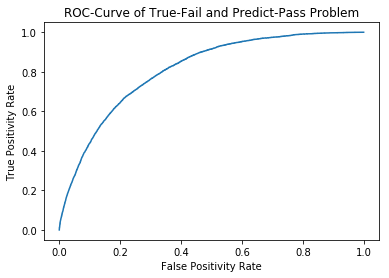

In [37]:
# plot ROC curve 
plt.plot(fpr, tpr)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC-Curve of True-Fail and Predict-Pass Problem")
plt.show()

The more the curve is in the top left corner, the better it is for our classification. This would correspond to a high recall rate while simultaneously having a low false positivity rate. This would also go hand-in-hand with having a low false negativity rate, which we initially wanted to visualize. The false negativity rate can be deduced from the TPR by calculating: $\text{FNR} = 1 - \text{TPR}$. Having a curve that is much stronger to the top left corner also reduces the FNR, i.e. our desired state.

Let's see to what level we had to lower our threshold to receive at least 85% recall.

In [38]:
roc_df[6700:6710]

,fpr,tpr,thresholds
6700,0.398435,0.851599,0.125696
6701,0.398435,0.851770,0.125689
6702,0.399308,0.851770,0.125457
6703,0.399308,0.851941,0.125448
6704,0.399336,0.851941,0.125445
6705,0.399336,0.852111,0.125444
6706,0.399561,0.852111,0.125404
6707,0.399561,0.852282,0.125400
6708,0.399645,0.852282,0.125340
6709,0.399645,0.852795,0.125313


As an example, we would have to lower our probability threshold to around 12.5% to get 85% recall for the `Fail` class. 

It is important to keep in mind that this is just a theoretical example that simplisticly created a binary problem out of a multi-class classification. In multi-clas problems, the final prediction is constantly affected by all other probability values. Changing the threshold here to 12.5% for the `Fail` class and thus classifying everything as `0` as soon as the probability hit that threshold would negatively affect all other classifications, so this is not a viable change on its own. 

All in all, our current model is highly biased in favor of the `Pass` class. Excluding the `Distinction` class, the model always predicts `Pass` most often, which shows us that the model is not able to differentiate between classes and thus predicts `Pass` most often. Even for the `Distinction` class, the model predicts only 40% of cases correctly (recall = 40%). The second most predicted class is again `Pass`, so even there seems to be problem of a lot of noise involved.

In [39]:
# create a DataFrame to store our the test accuracies and save the file
save_df = pd.DataFrame({
    "model": ["baseline", "baseline_b", "baseline_j", "lr", "lr_b", "lr_j"],
    "test_accuracy": [logreg_baseline, logreg_baseline_b, logreg_baseline_j,
                      logreg_acc, logreg_acc_b, logreg_acc_j]})

# save the df
save_df.to_csv("/Users/Ingo/Python Files/Capstone Project/results/03-logistic-regression-results.csv",
              index = False)

In [40]:
# get recall scores in variables
logreg_recall_0 = 0.09
logreg_recall_1 = 0.25
logreg_recall_2 = 0.95
logreg_recall_3 = 0.4

# create a DataFrame to store recall scores and save the file
save_df_recall = pd.DataFrame({
    "classes": [0, 1, 2, 3],
    "recall": [logreg_recall_0, logreg_recall_1, logreg_recall_2, logreg_recall_3]})

# save the df
save_df_recall.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/03-logistic-regression-recall-results.csv",
    index = False)

# save roc_curve values in df
roc_df.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/03-logistic-regression-roc-results.csv",
    index = False)